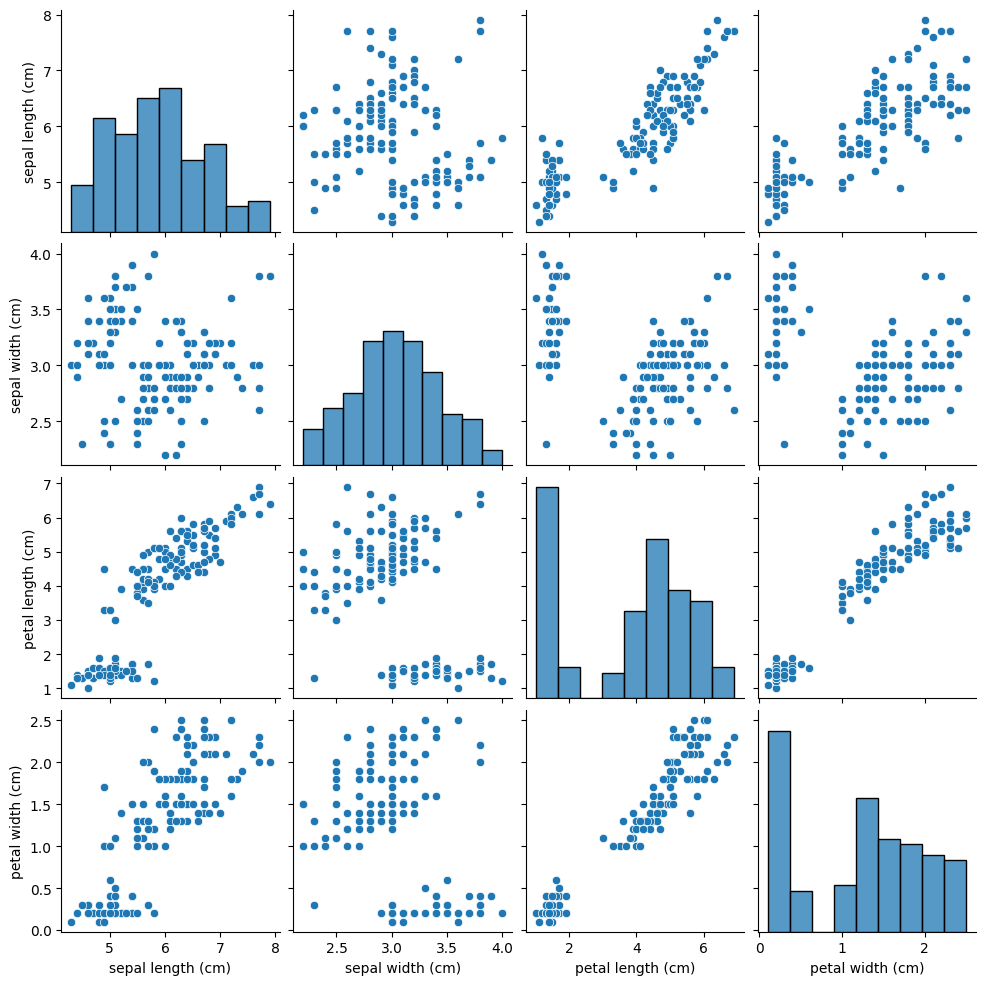

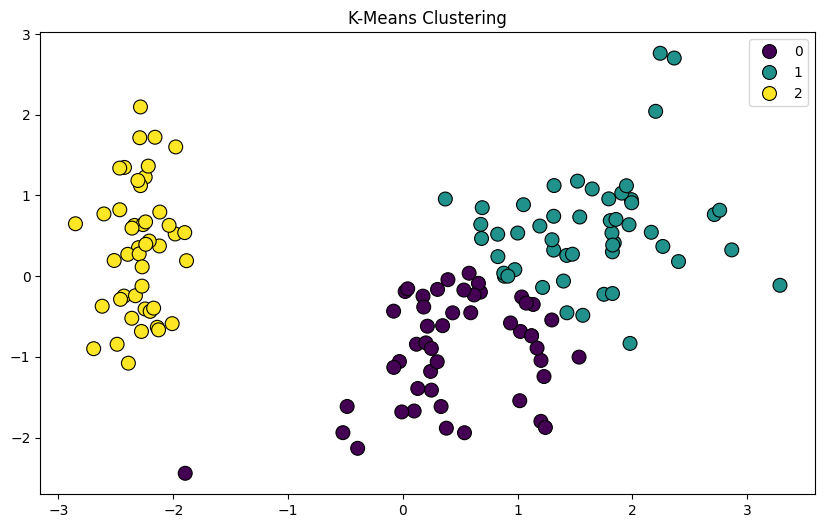

K-Means Silhouette Score: 0.46003837910849643


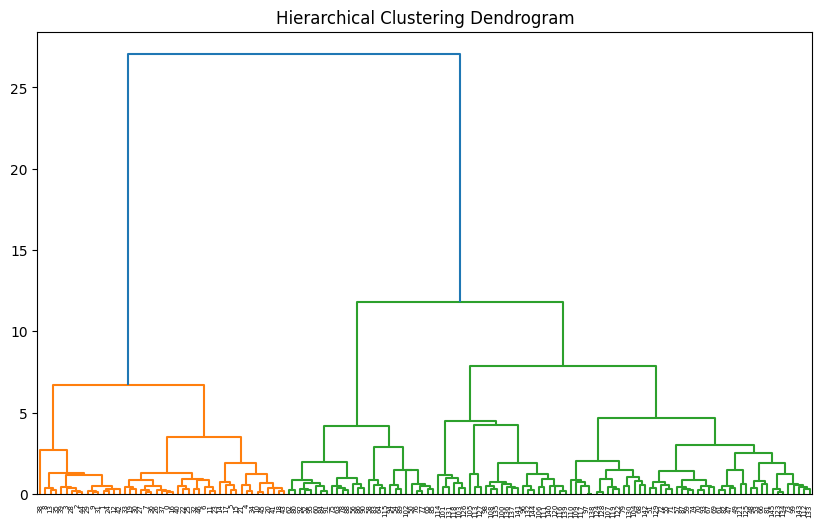

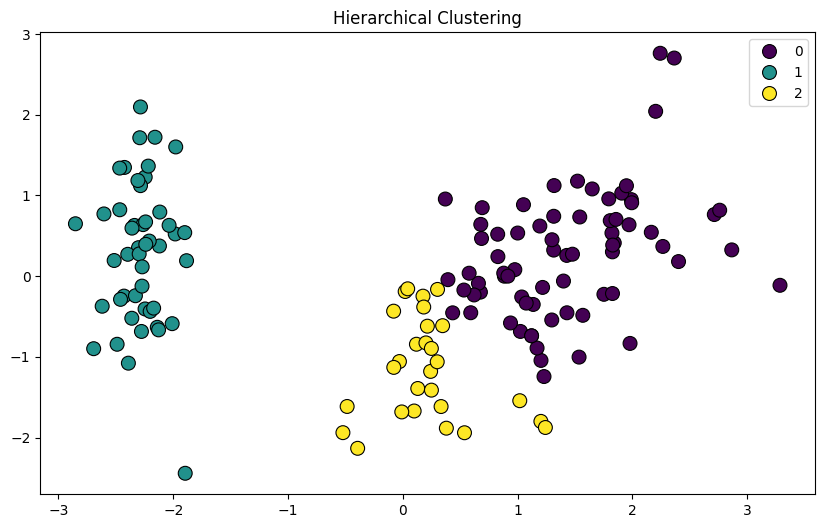

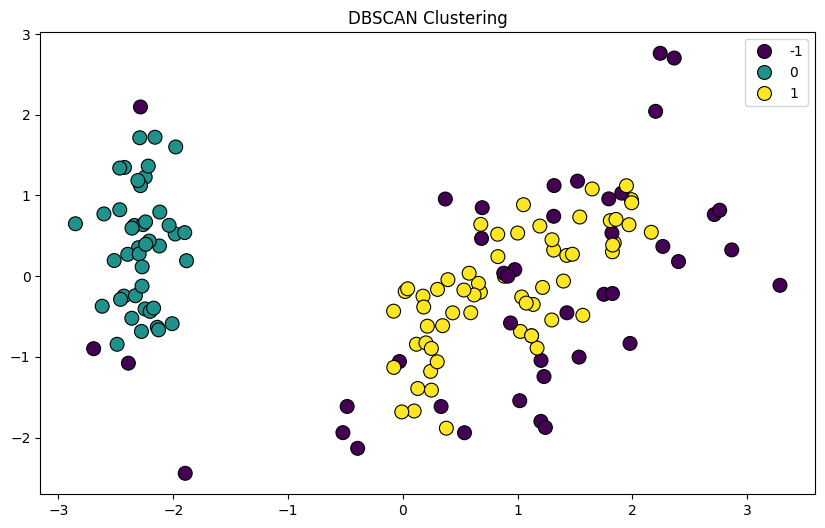

DBSCAN Silhouette Score: 0.6506916452171139
DBSCAN Davies-Bouldin Score: 0.5086637217592068


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# Load dataset (Replace with your actual dataset)
# Here we'll use the Iris dataset for demonstration.
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Data Preprocessing
## 1. Handle missing values
# If any, fill with the mean (you can also use median or mode based on the data)
df.fillna(df.mean(), inplace=True)

## 2. Remove Outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

## 3. Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

## 4. Exploratory Data Analysis (EDA)
sns.pairplot(df_filtered)
plt.show()

# Step 1: Implement K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for Iris dataset
kmeans_labels = kmeans.fit_predict(df_scaled)

# Visualize K-Means Clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette="viridis", s=100, edgecolor='k')
plt.title("K-Means Clustering")
plt.show()

# Evaluate K-Means using Silhouette Score
sil_score_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {sil_score_kmeans}")

# Step 2: Implement Hierarchical Clustering
linked = linkage(df_scaled, method='ward')  # Using Ward linkage
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Apply Agglomerative Clustering (for simplicity, assuming 3 clusters)
from sklearn.cluster import AgglomerativeClustering
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clust.fit_predict(df_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agg_labels, palette="viridis", s=100, edgecolor='k')
plt.title("Hierarchical Clustering")
plt.show()

# Step 3: Implement DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_labels, palette="viridis", s=100, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.show()

# Evaluate DBSCAN using Silhouette Score (ignoring -1 for noise)
valid_dbscan_labels = dbscan_labels != -1
sil_score_dbscan = silhouette_score(df_scaled[valid_dbscan_labels], dbscan_labels[valid_dbscan_labels])
print(f"DBSCAN Silhouette Score: {sil_score_dbscan}")

# Step 4: Evaluation Metrics
## Davies-Bouldin Score for DBSCAN (ignoring noise points)
davies_bouldin = davies_bouldin_score(df_scaled[valid_dbscan_labels], dbscan_labels[valid_dbscan_labels])
print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin}")
